In [1]:
from sequenzo import *
import pandas as pd

In [ ]:
# 其他替换方法（备选）

# 方法2: 逐列替换
# for col in time_cols:
#     df[col] = df[col].replace(value_mapping)

# 方法3: 使用loc进行条件替换
# for old_val, new_val in value_mapping.items():
#     mask = df[time_cols] == old_val
#     df.loc[:, time_cols] = df.loc[:, time_cols].where(~mask, new_val)

# 验证替换是否成功
print("验证特定值是否已被替换:")
for old_val, new_val in value_mapping.items():
    count_old = (df[time_cols] == old_val).sum().sum()
    count_new = (df[time_cols] == new_val).sum().sum()
    print(f"'{old_val}' 剩余数量: {count_old}")
    print(f"'{new_val}' 新增数量: {count_new}")
    print()


In [2]:
# ------------------------
# Step 0: 定义提取工具函数
# ------------------------

def extract_state_space(sequences):
    return sorted(set(s for seq in sequences for s in seq))

# ------------------------
# Step 1: 读取和准备数据
# ------------------------

df = pd.read_csv("/Users/lei/Documents/Sequenzo_all_folders/sequenzo_local/test_data/real_data_my_paper/detailed_sequence_10_work_years_df.csv")

time_cols = [f"C{i}" for i in range(1, 11)]  # C1~C10

# 假设 'country' 是一列，值为 'India' 或 'US'
india_df = df[df["country"] == "india"].copy()
us_df = df[df["country"] == "us"].copy()

T = len(time_cols)  # 一般是固定 10

# 提取 sequence 列
india_sequences = extract_sequences(india_df, time_cols)
us_sequences = extract_sequences(us_df, time_cols)

india_states = extract_state_space(india_sequences)
us_states = extract_state_space(us_sequences)

# ------------------------
# Step 2: 构建前缀树
# ------------------------

india_tree = build_prefix_tree(india_sequences)
us_tree = build_prefix_tree(us_sequences)

# 为每个国家分别建模
india_model = IndividualDivergence(india_sequences)
us_model = IndividualDivergence(us_sequences)

In [3]:
india_prefix_counts = compute_prefix_count(india_tree, T)
india_branching_factors = compute_branching_factor(india_tree, T)
india_js_scores = compute_js_divergence(india_sequences, state_set=india_states)

us_prefix_counts = compute_prefix_count(us_tree, T)
us_branching_factors = compute_branching_factor(us_tree, T)
us_js_scores = compute_js_divergence(us_sequences, state_set=us_states)

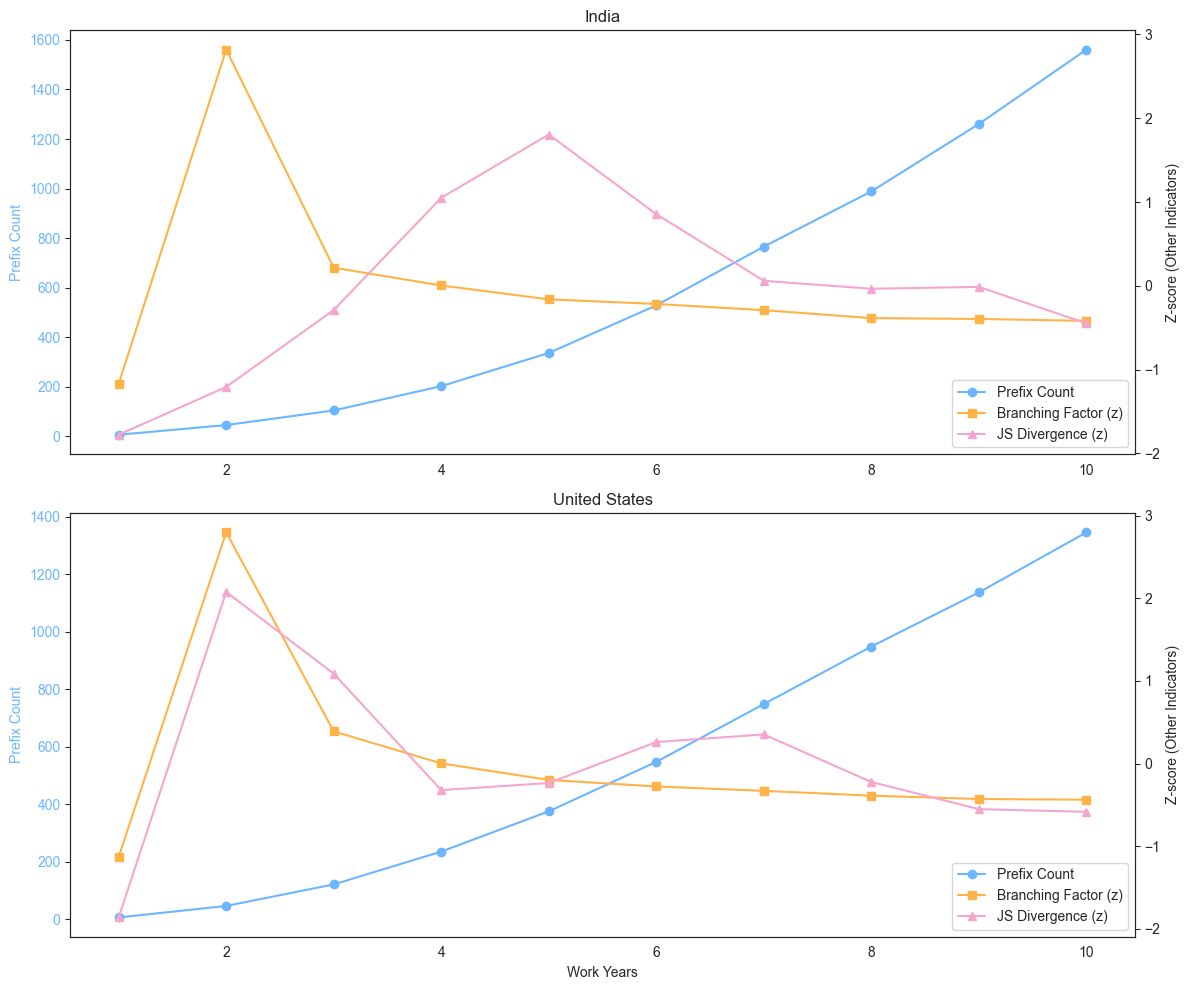

✅ 已生成带有自定义标题的对比图


<Figure size 640x480 with 0 Axes>

In [8]:
# 演示自定义子图标题功能
# 使用完全自定义的标题

# 明确从 prefix_tree 导入函数
from sequenzo.prefix_tree.system_level_indicators import plot_system_indicators_multiple_comparison

# 准备两组数据
custom_groups_data = {
    "IND": {
        "prefix_counts": india_prefix_counts,
        "branching_factors": india_branching_factors,
        "js_divergence": india_js_scores  
    },
    "USA": {
        "prefix_counts": us_prefix_counts,
        "branching_factors": us_branching_factors,
        "js_divergence": us_js_scores  
    }
}

# 使用自定义子图标题
plot_system_indicators_multiple_comparison(
    groups_data=custom_groups_data,
    group_names=["India", "United States"],  # 这个仅用于默认标题格式，当有subplot_titles时会被覆盖
    subplot_titles=[
        "India", 
        "United States"
    ],  # 完全自定义的子图标题
    x_values=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],  # 可以是年份、时期等
    x_label="Work Years",  # 自定义x轴标签
    legend_loc='lower right',  # 图例位置
    save_as="prefix_system_indicators_comparison",
    style="white"
)

print("✅ 已生成带有自定义标题的对比图")


In [9]:
# ------------------------
# Step 4: 计算个体层指标
# ------------------------

# 赋值回 dataframe
india_df["diverged"] = india_model.compute_diverged()
india_df["first_divergence_year"] = india_model.compute_first_divergence_year()
india_df["prefix_rarity_score"] = india_model.compute_prefix_rarity_score()
india_df["path_uniqueness"] = india_model.compute_path_uniqueness()

us_df["diverged"] = us_model.compute_diverged()
us_df["first_divergence_year"] = us_model.compute_first_divergence_year()
us_df["prefix_rarity_score"] = us_model.compute_prefix_rarity_score()
us_df["path_uniqueness"] = us_model.compute_path_uniqueness()

# 合并回总数据
df = pd.concat([india_df, us_df], ignore_index=True)

df

,worker_id,gender,country,cohort,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,diverged,first_divergence_year,prefix_rarity_score,path_uniqueness
0,dilip-kumar-nath-7538746a,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,7.070030,0
1,vinodkumar-yadav-b7a976107,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,7.070030,0
2,josh-slosson-07a1509,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,7.070030,0
3,jonatthan-rodriguez-8a5612121,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,7.070030,0
4,jeenesh-jyothindran-8ba28818,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,7.070030,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38897,nan-jiang-743a9863,female,us,0-10 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,4.528812,0
38898,tina-pava-4846207,female,us,21-30 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,4.528812,0
38899,sariandoni,female,us,21-30 total work years,support & test,software,software,software,software,software,software,research,research,research,1,2.0,64.726362,3
38900,nancy-jain-a8723460,female,us,0-10 total work years,software,software,software,software,software,support & test,software,software,software,software,1,6.0,42.500654,0


First divergence Year 柱状图对比

first_divergence_year 是一个事件变量，只在 diverged == 1 的个体上有意义，因此在 diverged == 0 的行中为 NaN 是完全合理的。

为了避免图像误导或报错，我们在可视化时应该：

* 仅绘制非 NaN 的 divergence_year

* 并区分国家以便对比

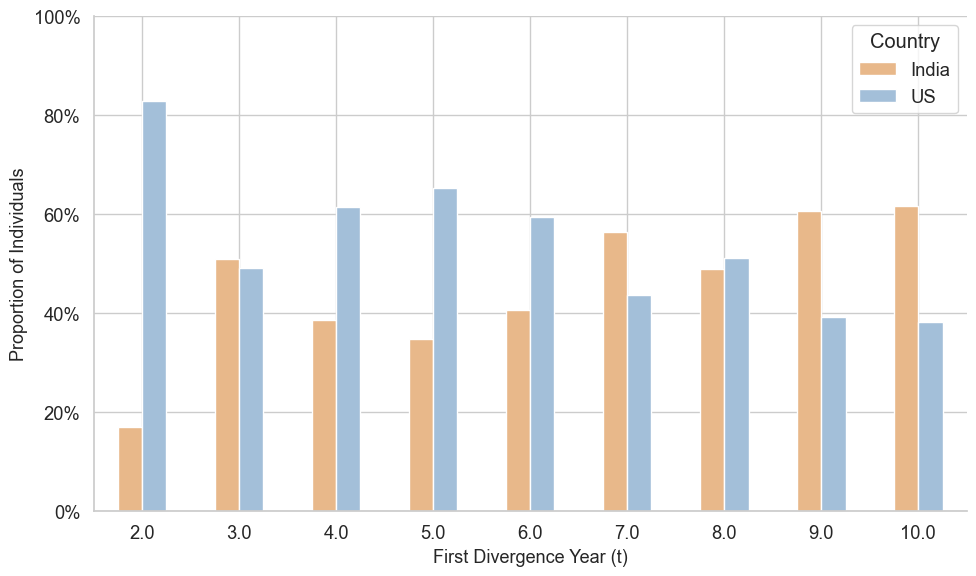

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

# 只保留 diverged 个体
diverged_df = df[df["diverged"] == 1].copy()

# 分国家计数（行：年份；列：国家）
vc_divergence = diverged_df.groupby("country")["first_divergence_year"].value_counts().unstack().fillna(0).T

# 重命名列为想要的图例标签
vc_divergence = vc_divergence.rename(columns={"india": "India", "us": "US"})

# 转为“每个年份内各国占比”（每一行和为1）
row_sums = vc_divergence.sum(axis=1).replace(0, 1)  # 防止除0
vc_prop = vc_divergence.divide(row_sums, axis=0)

# 设置画布
sns.set(style="whitegrid", font_scale=1.2)
fig, ax = plt.subplots(figsize=(10, 6))

india_color = "#E8B88A"
us_color = "#A3BFD9"

# 绘图（并排显示占比）
vc_prop.plot(
    kind="bar",
    ax=ax,
    color=[india_color, us_color]
)

# 设置标题与标签
ax.set_xlabel("First Divergence Year (t)", fontsize=13)
ax.set_ylabel("Proportion of Individuals", fontsize=13)
ax.set_ylim(0, 1)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.xticks(rotation=0)
plt.legend(title="Country")
sns.despine()
plt.tight_layout()
plt.savefig("First Divergence Year Distribution by Country (Proportion)", 
            dpi=300, 
            bbox_inches='tight')
plt.show()

Prefix Rarity Score 分布 KDE 对比

先对 prefix rarity score 做 z-score 标准化，然后在图中画出 z = 1.5 对应的位置（即：标准化后的值为 1.5 的位置，在原始数据中的对应值）。

步骤逻辑：
1. 计算每组 prefix rarity score 的整体均值与标准差；
2. 使用这些参数把整个数据 z-score 标准化；
3. 计算 z = 1.5 对应的原始值；
4. 在原图中加一条竖线显示这个阈值位置。

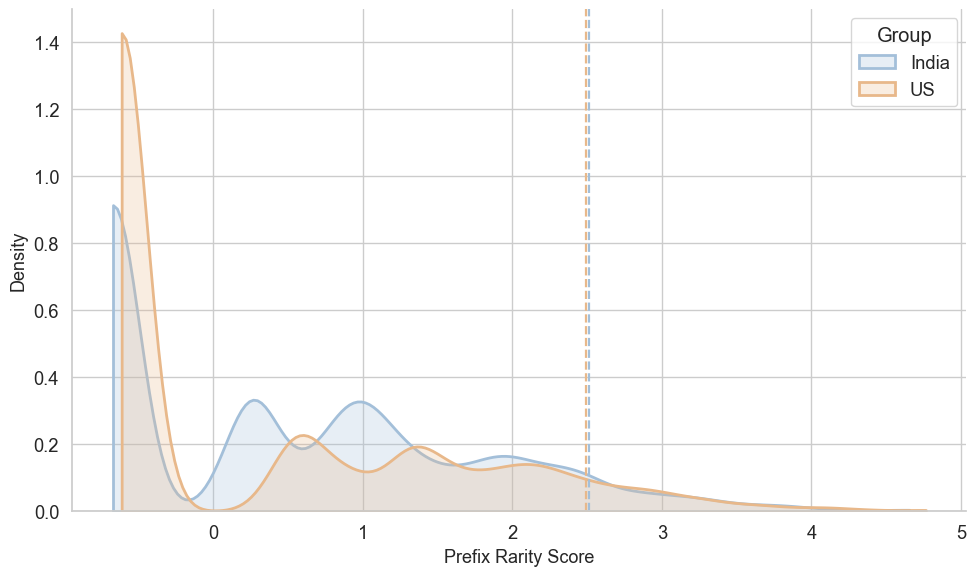

{'per_group': {'India': {'threshold_value': 2.513789182688454,
   'k': 1057,
   'n': 15113,
   'prop_selected': 0.0699397869383974,
   'num_geq_threshold': 1088},
  'US': {'threshold_value': 2.49100301147051,
   'k': 1665,
   'n': 23789,
   'prop_selected': 0.06999033166589601,
   'num_geq_threshold': 1743}},
 'threshold_method': 'topk'}

In [34]:
from sequenzo import IndividualDivergence, plot_prefix_rarity_distribution
import numpy as np

# 1) 分组各自建模（组内做列向 z 标准化）
indiv_india = india_model
indiv_us    = us_model

india_stat = indiv_india.compute_standardized_rarity_score(min_t=3, window=1)
us_stat    = indiv_us.compute_standardized_rarity_score(min_t=3, window=1)

# 可自检：判定与统计量一致
flags_india = indiv_india.compute_diverged(z_threshold=1.5, min_t=3, window=1)
flags_us    = indiv_us.compute_diverged(z_threshold=1.5, min_t=3, window=1)
assert ((np.array(india_stat) >= 1.5) == np.array(flags_india)).all()
assert ((np.array(us_stat)    >= 1.5) == np.array(flags_us)).all()

# 2) 画图：竖线就是决策边界
# 绘制分布图，竖线现在真正代表分类边界
plot_prefix_rarity_distribution(
    data={"India": india_stat, "US": us_stat},
    # is_standardized_score=True,  # 关键参数！
    z_threshold=1.5,
    # proportion_p=0.07,
    save_as="prefix_standardized_rarity_comparison"
)


In [14]:
for country in ['india', 'us']:
    
    country_df = df[df['country']==country]
    
    print(f'{country} - full sample size, {country_df.shape[0]}')
    
    print(country)

    print(country_df['diverged'].value_counts())

india - full sample size, 15113
india
diverged
0    11921
1     3192
Name: count, dtype: int64
us - full sample size, 23789
us
diverged
0    18028
1     5761
Name: count, dtype: int64


In [15]:
df.rename(columns={f"C{i}": str(i) for i in range(1, 11)}, inplace=True)

df

,worker_id,gender,country,cohort,1,2,3,4,5,6,7,8,9,10,diverged,first_divergence_year,prefix_rarity_score,path_uniqueness
0,dilip-kumar-nath-7538746a,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,7.070030,0
1,vinodkumar-yadav-b7a976107,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,7.070030,0
2,josh-slosson-07a1509,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,7.070030,0
3,jonatthan-rodriguez-8a5612121,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,7.070030,0
4,jeenesh-jyothindran-8ba28818,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,7.070030,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38897,nan-jiang-743a9863,female,us,0-10 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,4.528812,0
38898,tina-pava-4846207,female,us,21-30 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,4.528812,0
38899,sariandoni,female,us,21-30 total work years,support & test,software,software,software,software,software,software,research,research,research,1,2.0,64.726362,3
38900,nancy-jain-a8723460,female,us,0-10 total work years,software,software,software,software,software,support & test,software,software,software,software,1,6.0,42.500654,0


In [16]:
df.to_csv('df.csv', index=False)

In [20]:
df[df['1']=='data']

,worker_id,gender,country,cohort,1,2,3,4,5,6,7,8,9,10,diverged,first_divergence_year,prefix_rarity_score,path_uniqueness
16,prabhakar-srivastawa-4b0328129,male,india,21-30 total work years,data,data,data,data,data,data,data,data,data,data,0,NaN,32.831073,0
22,atul-soni-b59062111,male,india,11-20 total work years,data,data,data,data,software,software,software,software,software,software,1,5.0,56.470029,0
24,jonalsip,male,india,11-20 total work years,data,data,data,data,data,data,data,data,data,data,0,NaN,32.831073,0
40,suriya-murugasan-a5893395,male,india,0-10 total work years,data,data,data,data,data,data,data,data,data,data,0,NaN,32.831073,0
59,ravichandra-ragi-406724111,male,india,11-20 total work years,data,data,data,data,support & test,support & test,support & test,support & test,support & test,support & test,1,5.0,58.669437,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38676,emily-pan-41047811b,female,us,11-20 total work years,data,data,software & hardware,software & hardware,software & hardware,software & hardware,software & hardware,software & hardware,software & hardware,software & hardware,1,3.0,73.996279,0
38739,nandini-banerjee-3055396,female,us,11-20 total work years,data,data,data,data,data,data,data,data,data,data,0,NaN,32.715284,0
38740,maryna-ryasnianska-931a0473,female,us,11-20 total work years,data,data,data,data,data,data,data,data,data,data,0,NaN,32.715284,0
38753,mary-h-romano-73b9b2126,female,us,21-30 total work years,data,data,data,data,data,data,data,data,data,data,0,NaN,32.715284,0


把df里面叫做1-10的columns的values data & intensive math 改成 data science, software & hardware 改成 systems & infrastructure

In [31]:
# 替换列1-10中的特定值
time_cols = [str(i) for i in range(1, 11)]  # ['1', '2', '3', ..., '10']

# 定义要替换的值映射
value_mapping = {
    'data & intensive math': 'data science',
    'software & hardware': 'systems & infrastructure'
}

# 方法1: 使用replace()方法批量替换指定列
df[time_cols] = df[time_cols].replace(value_mapping)

print("替换完成！")
print("检查替换结果:")
for col in time_cols:
    unique_values = df[col].dropna().unique()
    print(f"列 {col} 的唯一值: {unique_values}")
    if len(unique_values) > 10:  # 如果值太多，只显示前几个
        print(f"  (显示前10个，总共{len(unique_values)}个)")
        break

df

替换完成！
检查替换结果:
列 1 的唯一值: ['software' 'support & test' 'data' 'systems & infrastructure'
 'data science' 'hardware' 'research']
列 2 的唯一值: ['software' 'support & test' 'data' 'systems & infrastructure'
 'data science' 'hardware' 'research']
列 3 的唯一值: ['software' 'support & test' 'data' 'systems & infrastructure'
 'data science' 'hardware' 'research']
列 4 的唯一值: ['software' 'support & test' 'data' 'systems & infrastructure'
 'data science' 'hardware' 'research']
列 5 的唯一值: ['software' 'support & test' 'data' 'systems & infrastructure'
 'data science' 'hardware' 'research']
列 6 的唯一值: ['software' 'support & test' 'data' 'systems & infrastructure'
 'data science' 'hardware' 'research']
列 7 的唯一值: ['software' 'hardware' 'support & test' 'data' 'systems & infrastructure'
 'data science' 'research']
列 8 的唯一值: ['software' 'hardware' 'support & test' 'data' 'systems & infrastructure'
 'data science' 'research']
列 9 的唯一值: ['software' 'support & test' 'hardware' 'data' 'systems & infrastructure'
 'data

,worker_id,gender,country,cohort,1,2,3,4,5,6,7,8,9,10,diverged,first_divergence_year,prefix_rarity_score,path_uniqueness
0,dilip-kumar-nath-7538746a,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,7.070030,0
1,vinodkumar-yadav-b7a976107,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,7.070030,0
2,josh-slosson-07a1509,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,7.070030,0
3,jonatthan-rodriguez-8a5612121,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,7.070030,0
4,jeenesh-jyothindran-8ba28818,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,7.070030,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38897,nan-jiang-743a9863,female,us,0-10 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,4.528812,0
38898,tina-pava-4846207,female,us,21-30 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,4.528812,0
38899,sariandoni,female,us,21-30 total work years,support & test,software,software,software,software,software,software,research,research,research,1,2.0,64.726362,3
38900,nancy-jain-a8723460,female,us,0-10 total work years,software,software,software,software,software,support & test,software,software,software,software,1,6.0,42.500654,0


-------------india-------------

[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 15113
[>] Number of time points: 10
[>] Min/Max sequence length: 10 / 10
[>] States: ['data', 'data science', 'hardware', 'research', 'software', 'support & test', 'systems & infrastructure']
[>] Labels: ['data', 'data science', 'hardware', 'research', 'software', 'support & test', 'systems & infrastructure']


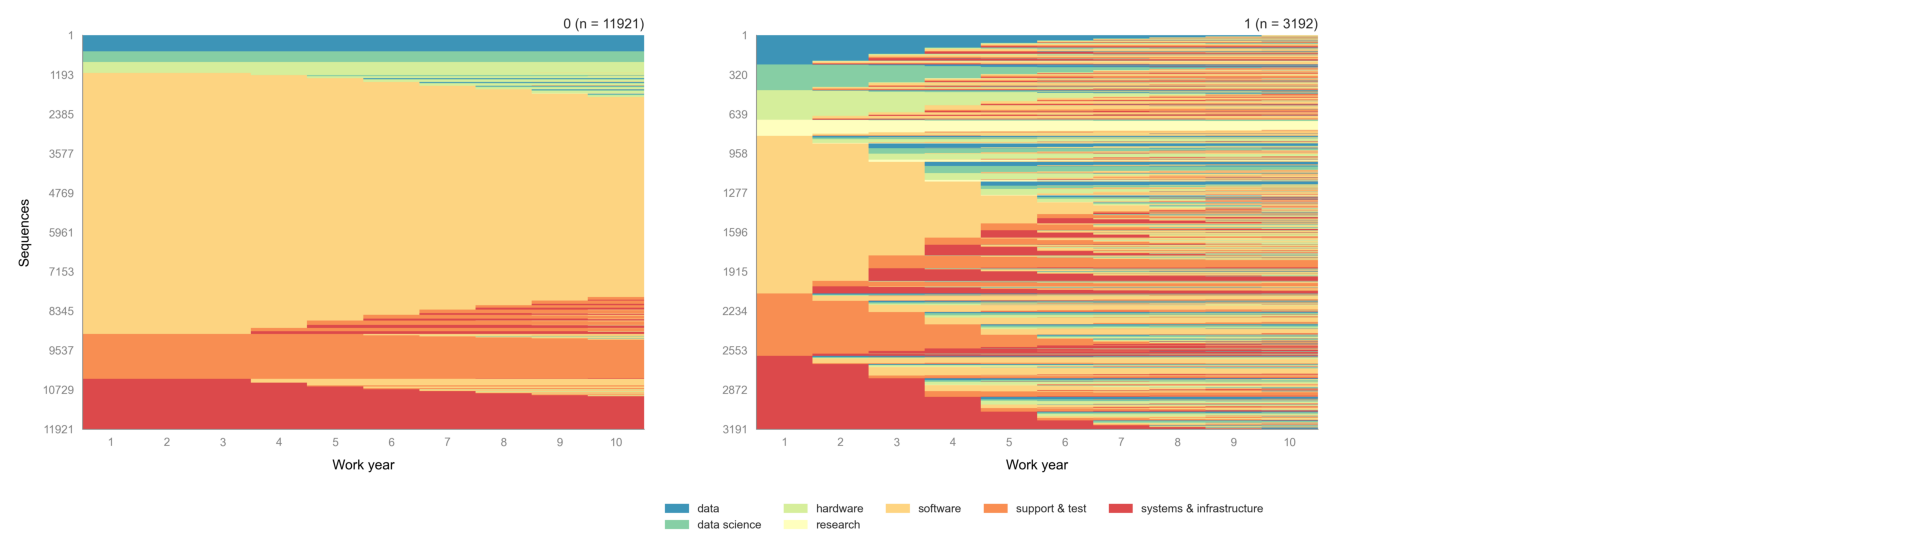

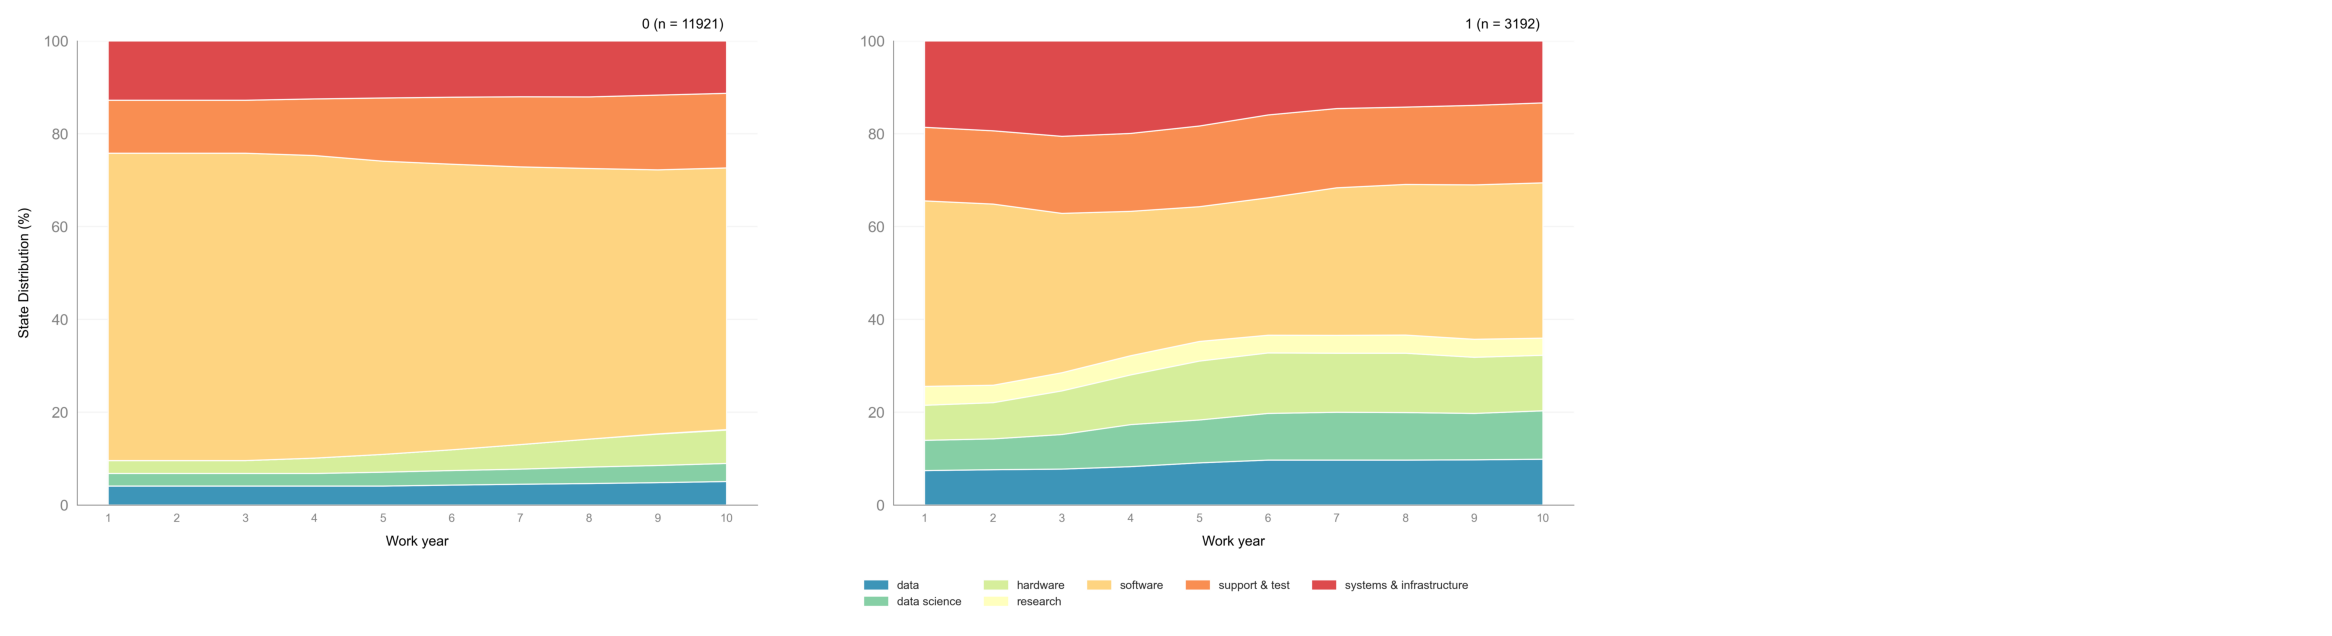

-------------us-------------

[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 23789
[>] Number of time points: 10
[>] Min/Max sequence length: 10 / 10
[>] States: ['data', 'data science', 'hardware', 'research', 'software', 'support & test', 'systems & infrastructure']
[>] Labels: ['data', 'data science', 'hardware', 'research', 'software', 'support & test', 'systems & infrastructure']


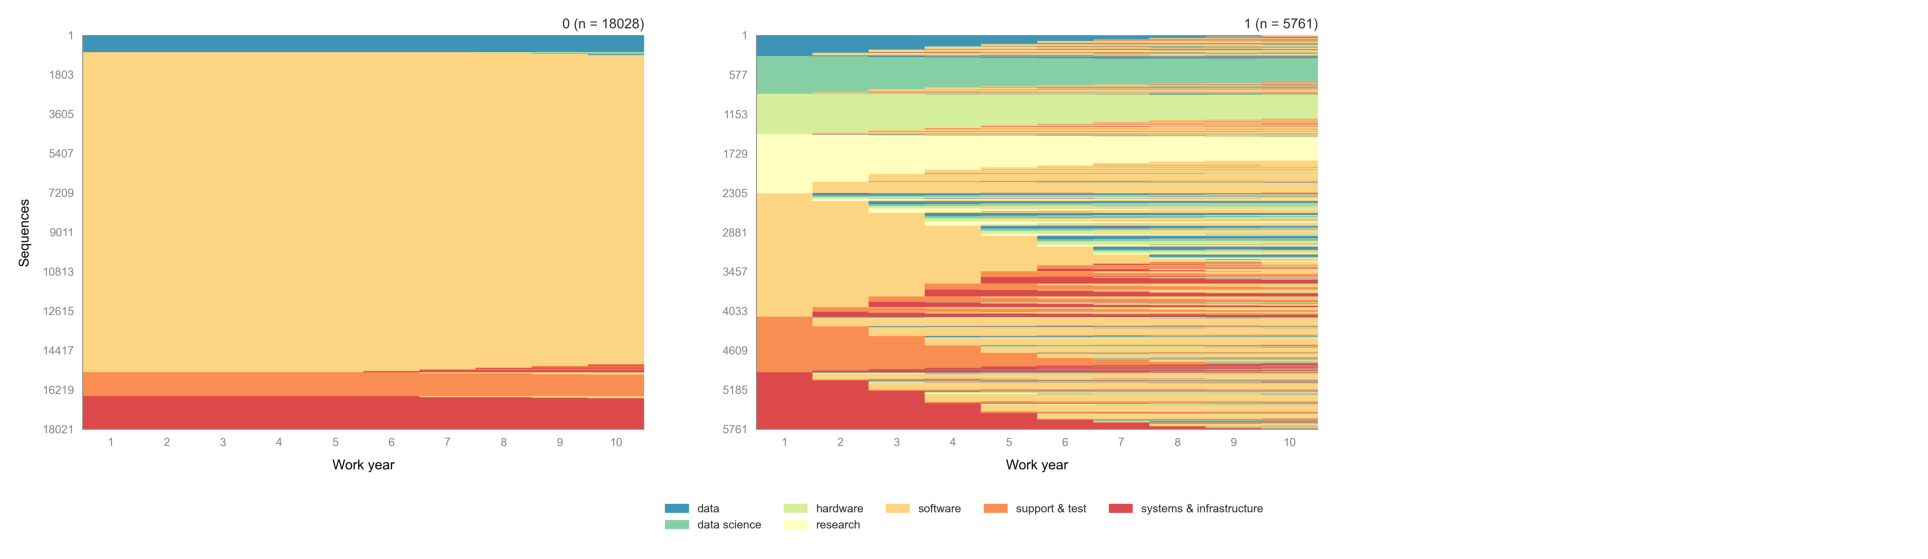

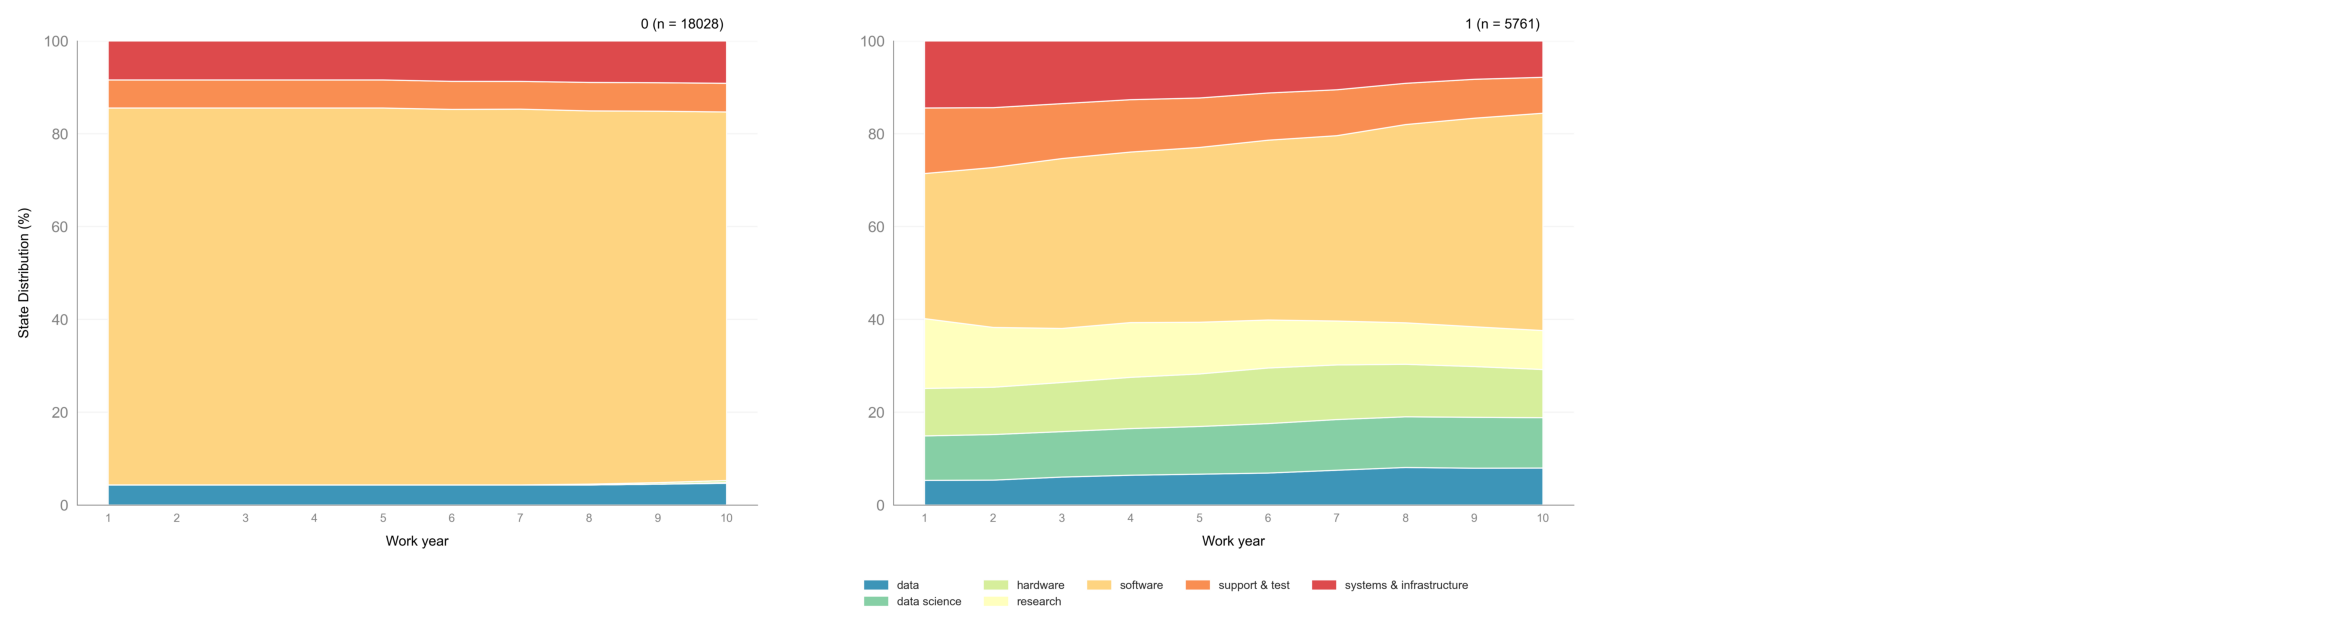

In [32]:
def by_country_plotting_sequences(country_name, country_dataframe):
    from sequenzo import SequenceData
    from sequenzo.visualization import plot_sequence_index, plot_state_distribution
    
    time_cols = [str(i) for i in range(1, 11)]
    # state_list = ['data', 'data & intensive math', 'hardware', 'research', 'software', 'software & hardware', 'support & test']
    state_list = sorted(country_dataframe[time_cols].stack().dropna().unique().tolist())  # e.g. ['data', 'hardware', ...]
    
    if not state_list:
        print(f"Warning: No states found for {country_name}!")
        return

    seq = SequenceData(
        data=country_dataframe,
        id_col="worker_id",
        time=time_cols,
        states=state_list,
        time_type="age",
    )
    
    plot_sequence_index(
        seqdata=seq,
        id_group_df=country_dataframe,
        categories="diverged",
        # title="Sequence Index Plot: Diverged vs Mainstream Paths",
        # sort_by="transition_count",  # 可选排序方式
        save_as=f"{country_name}_diverged_vs_mainstream_index_plot.png",
        dpi=300,
        xlabel="Work year"
    )
    
    plot_state_distribution(
        seqdata=seq,
        id_group_df=country_dataframe,
        categories="diverged",
        # title="Sequence Index Plot: Diverged vs Mainstream Paths",
        # sort_by="transition_count",  # 可选排序方式
        save_as=f"{country_name}_diverged_vs_mainstream_state_distribution_plot.png",
        dpi=300,
        xlabel="Work year"
    )


for country in ['india', 'us']:
    print(f'-------------{country}-------------')
    country_df = df[df['country'] == country]
    by_country_plotting_sequences(country, country_df)
    

In [33]:
df.to_csv('df.csv', index=False)